<a href="https://colab.research.google.com/github/SefiyeArican/plant_seedlings_classification/blob/main/PlantseedlingsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DRIVE ÜZERİNDEN VERİSETİNE ERİŞİM

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/plant-seedlings-classification.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

VERİ YÜKLEME VE İNCELEME ADIMLARI

In [44]:
import os

# Veri setinin bulunduğu dizin
data_dir = '/content'

# Train sınıfı ve alt sınıflar için
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Sınıf: {class_name}")
        # Sınıf dizinindeki alt dizinlerin listesi
        sub_classes = [sub_class for sub_class in os.listdir(class_dir) if os.path.isdir(os.path.join(class_dir, sub_class))]
        for sub_class_name in sub_classes:
            sub_class_dir = os.path.join(class_dir, sub_class_name)
            print(f"Alt Sınıf: {sub_class_name}")
            image_files = [file for file in os.listdir(sub_class_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
            if image_files:
                print(f"{len(image_files)} görüntü dosyası bulundu.")
            # else:
            #     print("Bu alt sınıfta görüntü dosyası bulunamadı.")
    # else:
    #     print(f"{class_name} bir sınıf dizini değil.")

print(" ")
# Test sınıfı için
test_dir = os.path.join(data_dir, 'test')
if os.path.isdir(test_dir):
    image_files = [file for file in os.listdir(test_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
    if image_files:
        print(f"Sınıf: test")
        print(f"{len(image_files)} görüntü dosyası bulundu.")
#     else:
#         print("Test sınıfında görüntü dosyası bulunamadı.")
# else:
#     print("Test sınıfı bulunamadı.")

Sınıf: .config
Alt Sınıf: logs
Alt Sınıf: configurations
Sınıf: test
Sınıf: drive
Alt Sınıf: MyDrive
Alt Sınıf: .shortcut-targets-by-id
Alt Sınıf: .file-revisions-by-id
Alt Sınıf: .Trash-0
Sınıf: train
Alt Sınıf: Charlock
390 görüntü dosyası bulundu.
Alt Sınıf: Scentless Mayweed
516 görüntü dosyası bulundu.
Alt Sınıf: Cleavers
287 görüntü dosyası bulundu.
Alt Sınıf: Loose Silky-bent
654 görüntü dosyası bulundu.
Alt Sınıf: Shepherds Purse
231 görüntü dosyası bulundu.
Alt Sınıf: Maize
221 görüntü dosyası bulundu.
Alt Sınıf: Black-grass
263 görüntü dosyası bulundu.
Alt Sınıf: Common wheat
221 görüntü dosyası bulundu.
Alt Sınıf: Sugar beet
385 görüntü dosyası bulundu.
Alt Sınıf: Fat Hen
475 görüntü dosyası bulundu.
Alt Sınıf: Small-flowered Cranesbill
496 görüntü dosyası bulundu.
Alt Sınıf: Common Chickweed
611 görüntü dosyası bulundu.
Sınıf: sample_data
 
Sınıf: test
794 görüntü dosyası bulundu.


Veri setinde 'test' ve 'train' adında iki sınıf bulunmaktadır. Train sınıfının toplam 12 alt sınıfı bulunmaktadır. Bunlar; Black-grass, Charlock, Cleavers, Common Chickweed, Common wheat, Fat Hen, Loose Silky-bent, Maize, Scentless Mayweed, Shepherds Purse, Small-flowered Cranesbill, Sugar beet. Train sınıfına ait toplamda 4723, test sınıfına ait 794 görüntü bulunmaktadır.

SINIF DAĞILIMI TABLOSU

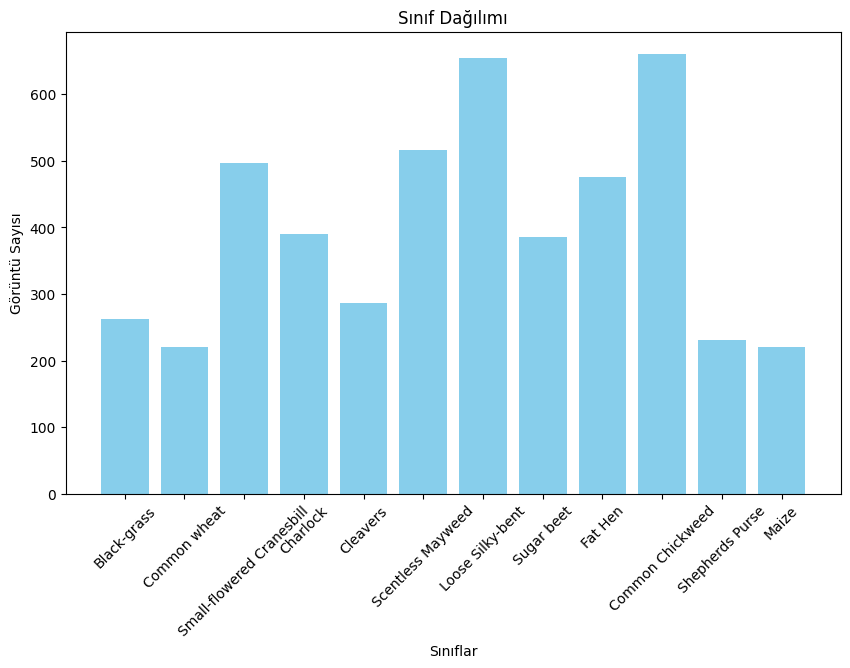

In [45]:
import matplotlib.pyplot as plt

# Sınıf adları ve sınıf içindeki görüntü sayıları
class_names = ['Black-grass','Common wheat', 'Small-flowered Cranesbill', 'Charlock', 'Cleavers', 'Scentless Mayweed',
              'Loose Silky-bent', 'Sugar beet', 'Fat Hen', 'Common Chickweed', 'Shepherds Purse', 'Maize']
class_counts = [263, 221, 496, 390, 287, 516, 654, 385, 475, 661, 231, 221]

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()

ÖRNEK GÖRÜNTÜ GÖRSELLEŞTİRMESİ

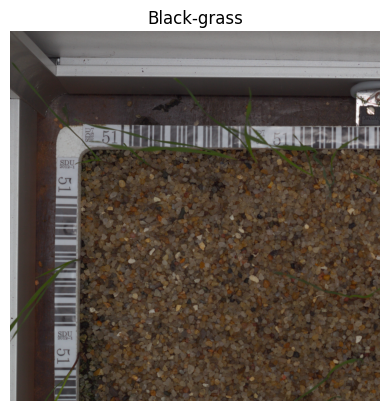

In [46]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content'

# train sınıfının 12 alt sınıfı olduğu için train ve test ana sınıflarını ayrı ayrı çekmemiz gerekiyor.
# train sınıfı verileri
class_train =  os.path.join(data_dir, 'train')
train_sub_classes = [sub_class for sub_class in os.listdir(class_train) if os.path.isdir(os.path.join(class_train, sub_class))]

# test sınıfı verileri
class_test = os.path.join(data_dir, 'test')

# Rastgele olarak 'train' alt sınıflarından veya 'test' sınıfından bir veri seçme işlemi
all_classes = ['test'] + train_sub_classes
selected_class = random.choice(all_classes)

# seçilecek ana sınıfa göre dosya yolu oluşturuyoruz.
if selected_class == 'test':
    selected_class_path = class_test
else:
    selected_class_path = os.path.join(class_train, selected_class)

sample_image_path = os.path.join(selected_class_path, random.choice(os.listdir(selected_class_path)))

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title(selected_class)
plt.show()

GÖRÜNTÜLERİN İŞLENEBİLMESİ İÇİN YENİDEN BOYUTLANDIRILMASI

cv2: OpenCV kütüphanesi, görüntü işleme için kullanılır.
glob: Dosya yollarını belirli bir desenle aramak için kullanılır.
numpy: Sayısal işlemler ve dizi manipülasyonları için kullanılır.
matplotlib.pyplot: Grafik çizmek için kullanılır (bu kodda kullanılmamış).
math: Matematiksel işlemler için kullanılır (bu kodda kullanılmamış).
pandas: Veri analizi ve manipülasyonu için kullanılır.

In [47]:
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

ScaleTo = 70  # px to scale
seed = 7
path = '/content/train/*/*.png'
files = glob(path)

trainImg = []
trainLabel = []
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))  # Get image (with resizing)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

trainImg: Eğitim görüntülerini depolayacak bir liste.
trainLabel: Görüntü etiketlerini depolayacak bir liste.
j: İşlenen dosyaların sayısını izlemek için kullanılan bir sayaç.
num: Toplam dosya sayısı.

cv2.imread(img): Görüntüyü dosya yolundan okur.
cv2.resize(..., (ScaleTo, ScaleTo)): Görüntüyü ScaleTo x ScaleTo boyutuna yeniden boyutlandırır.
trainImg.append(...): Yeniden boyutlandırılmış görüntüyü trainImg listesine ekler.
trainLabel.append(img.split('/')[-2]): Görüntünün bulunduğu klasör adını (etiket olarak) trainLabel listesine ekler. img.split('/')[-2] ifadesi, dosya yolunun ikinci son elemanını (klasör adı) alır.
print(str(j) + "/" + str(num), end="\r"): İşlenen dosya sayısını konsola yazar.
j += 1: Sayaç bir artırılır.

YENİDEN BOYUTLANDIRMA ÖRNEK GÖRSELLERİ

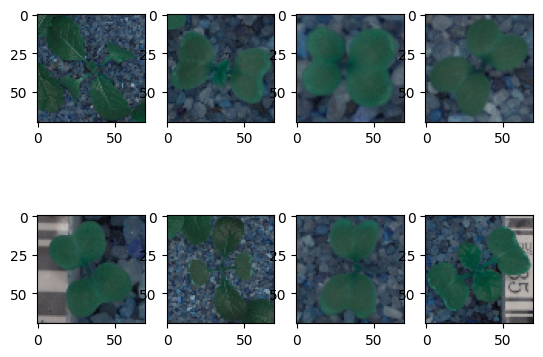

In [48]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

ARKAPLAN TEMİZLİK İŞLEMİ

Görüntülerdeki arkaplan gürültüdür. Yeşil bitkiyi maskeleme işlemi yapılarak gürültü temizlenecek. Arka planı kaldıracak maskeyi oluşturmak için RGB görüntüsünü HSV'ye dönüştürmemiz gerekir. (HSV: Hue(ton), Saturation(doygunluk), Value(değer)). HSV, RGB renk modelinin alternatifidir. HSV'de bir renk aralığını temsil etmek RGB renk uzayına göre daha kolaydır.

 Gürültüyü gidermek için önce görüntüyü bulanıklaştırmak gerekiyor. HSV görüntüsünü oluşturduktan sonra, deneysel olarak seçilen yeşil renk aralığına dayalı maske oluşturacağız, bunu boole maskesine dönüştüreceğiz ve orijinal görüntüye uygulayacağız. İzlenecek adımlar:

1. Gürültüyü kaldırmak için gauss bulanıklığı kullanılır.
2. RGB'den HSV dönüşümü .
3. Maskeleme işlemi.
4. Boolean maskeleme işlemi (bir veri kümesindeki belirli öğeleri seçmek veya filtrelemek için kullanılır).
5. Arkaplansız görüntüyü elde etme.



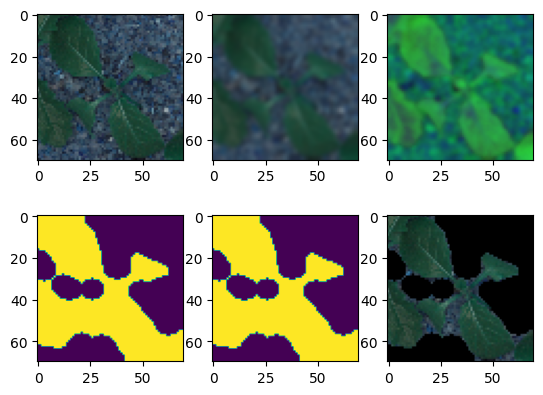

In [49]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImg:

    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   # Gauss bulanıklığı

    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  # RGB to HSV

    # Yeşil rengine göre maskeleme
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    bMask = mask > 0  # Bool maske

    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Boş görüntü oluşturma
    clear[bMask] = img[bMask]  # Başlangıç görüntüsüne boolean maskesi uygulama

    clearTrainImg.append(clear)  # Arka planı temizlenmiş görüntüleri kaydetmek için

    # Örnek çıktı
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Orijinal görüntü
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blurlu görüntü
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Maskeleme
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Arkaplansız görüntü
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

ARKAPLANDAN TEMİZLENMİŞ ÖRNEK GÖRÜNTÜLER

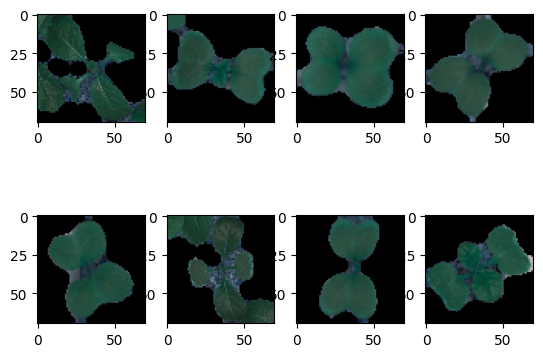

In [50]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

GÖRSELLERİ NORMALİZE ETME

In [12]:
clearTrainImg = clearTrainImg / 255

TRAIN SINIFI GÖRÜNTÜLERİNİ ETİKETLENDİRME

In [ ]:
!pip install keras-utils

In [ ]:
!pip install --upgrade keras tensorflow

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


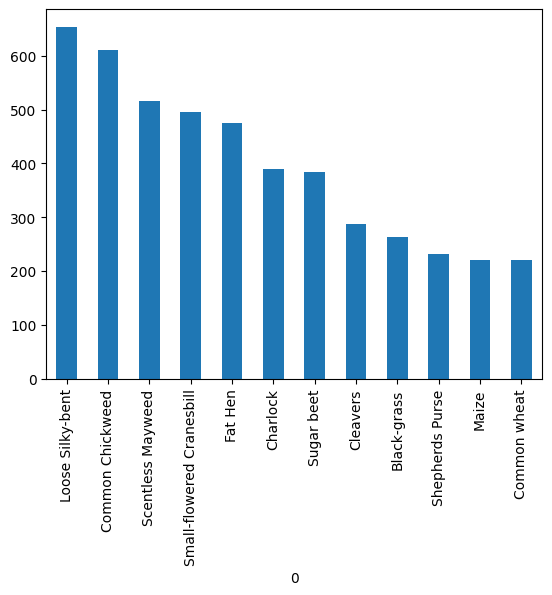

In [13]:
from keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainLabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainLabel[0])

# Convert labels to one-hot encoding
clearTrainLabel = to_categorical(encodeTrainLabels)
num_classes = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_classes))

# Plot of label types numbers
trainLabel[0].value_counts().plot(kind='bar')
plt.show()


VERİ BÖLME

Verilerimiz dengesiz dğılmış durumda, bu nedenle model setinin yanlış değerlendirilmesini önlemek için stratify=clearTrainLabel diyoruz.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(clearTrainImg, clearTrainLabel,
                                                test_size=0.1, random_state=seed,
                                                stratify = clearTrainLabel)

# VERİLERİ 0.2 İLE DE BÖL!!!!!!!!!!!!

MODEL OLUŞTURMA

In [ ]:
!pip install keras

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )
datagen.fit(X_train)

3.3. Model oluşturma
Model oluşturmak için Keras Sequential kullandım.

Modeli altı konvolüsyonel katman ve sonunda üç tam bağlantılı katman ile oluşturdum. İlk iki konvolüsyonel katman 64 filtreye, sonraki 128 filtreye ve son iki katman 256 filtreye sahiptir. Her bir konvolüsyon katmanı çiftinden sonra model maksimum havuzlama katmanına sahiptir. Ayrıca, her konvolüsyon katmanı çiftinden sonra aşırı uyumu azaltmak için dropout katmanı (konvolüsyonel katmanlar arasında %10 ve tam bağlantılı katmanlar arasında %50) ve her katman arasında toplu normalizasyon katmanı kullanıyoruz.

Sonunda sınıflandırma için üç tam bağlantılı katman kullandım. Son katmanda sinir ağı, 12 sınıfın her biri için olasılık dağılımını çıkarır.

Translated with www.DeepL.com/Translator (free version)

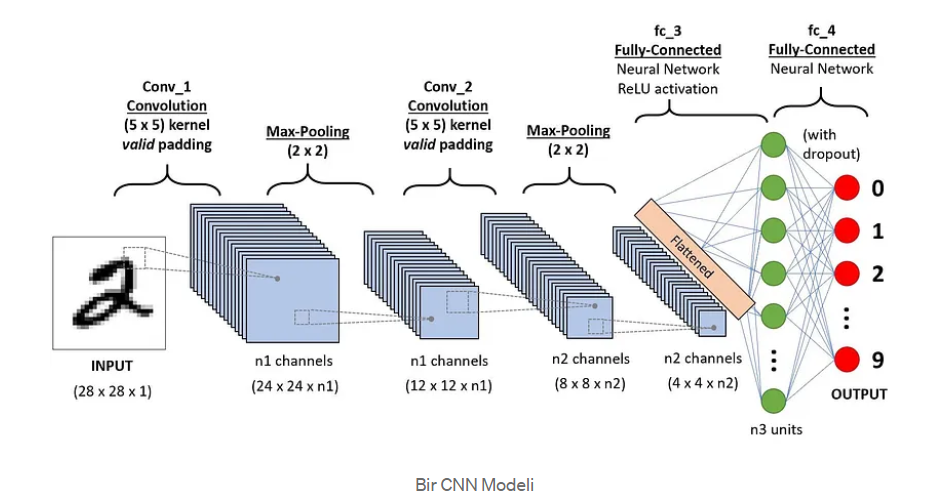

In [38]:
!pip install tensorflow

In [40]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

numpy.random.seed(seed)  # Fix seed

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(ScaleTo, ScaleTo, 3), activation='relu')) # 5x5'lik küçük matris ile özellik çıkarımı
model.add(BatchNormalization(axis=3))                                              # Negatif değerleri sınıflayan pozitifleri olduğu gibi bırakan aktivasyon katmanı
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2))) # 2x2'lik matrise indirgeme
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 64)        4864      
                                                                 
 batch_normalization (Batch  (None, 66, 66, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 31, 31, 64)        256       
 chNormalization)                                                
                                                        